<a href="https://colab.research.google.com/github/Feetly/ML/blob/master/Prml_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programming Assignment :  Regression

Course Advisor: Prof. S.R.M. Prasanna

Course TA's: Jagabandhu Mishra (183081002@iitdh.ac.in) and 
             Seema K. (173021001@iitdh.ac.in)


Regression:

Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following.

1) Fitting of line (one variable learning)

2) Fitting of line (two variable learning) 

3) Fitting of a plane (two variable)

4) Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

5) Polynomial regression

6) Pratical example of regression task (salary prediction)

# 1) Fitting of line

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=10$ and $w_{1}=1$ and generate y

iii) Plot (x,y)



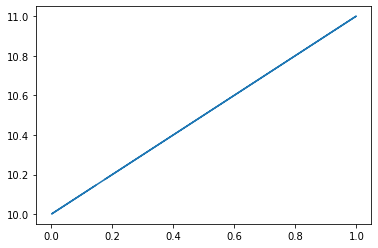

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(1000,1)
y = x + 10
plt.plot(x,y)

b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

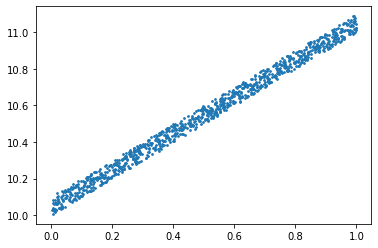

In [2]:
ycor = y + 0.1*np.random.rand(1000,1)
plt.scatter(x,ycor,s=3)

c)  Curve prediction using hurestic way.

i) Keep $w_{0}=10$ as constant and find $w_{1}$ ?

ii) Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that.

iii) Find $y_{pred}$ using each value of $w_{1}$.

iv) The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$.

$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{cor_{i}}-y_{pred_{i}})^2$$

v) Plot error vs srch_$w1$

vi) First plot the scatter plot (x,$y_{cor}$) , over that plot (x,$y_{bestpred}$).

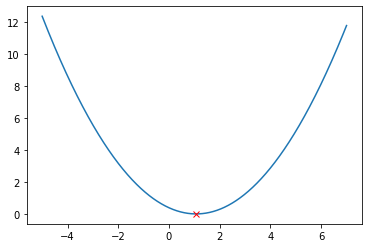

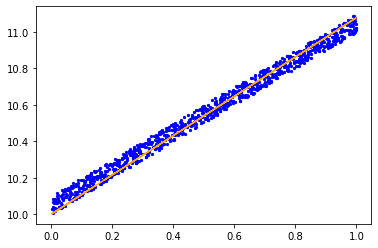

In [3]:
w1 = np.linspace(-5,7,1000)
ypred = np.asarray([i*x + 10 for i in w1])
error = np.asarray([np.mean((ycor-ypred[i])**2) for i in range(len(w1))])

w1_optimal = np.asarray(w1[np.where(error == np.min(error))[0][0]])
ypred_best = np.asarray(ypred[np.where(error == np.min(error))[0][0]])
error_min = np.asarray(np.mean((ycor-ypred_best)**2))

plt.plot(w1, error)
plt.plot(w1_optimal,error_min,'rx') 
plt.show()
plt.scatter(x,ycor,s=5,c='b')
plt.plot(x,ypred_best,c='orange')

d) Gradient descent

i) $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-(w_{0}+w_{1}x_{i}))^2$

ii) $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

iii) $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

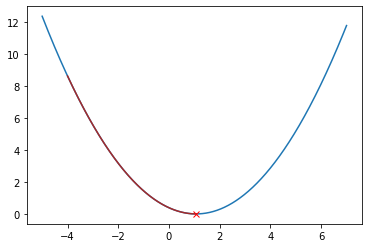

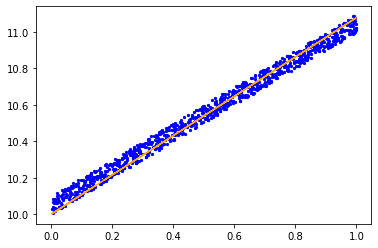

In [4]:
w1_rand=[-4]
lr = 0.01

while True :
    y_pred_rand = w1_rand[-1]*x+10
    error_rand = np.mean((ycor-y_pred_rand)**2)
    del_error = np.mean((ycor-y_pred_rand)*x)*(-2)
    w1_rand_new = w1_rand[-1] - lr*del_error
    if(abs(round(w1_rand_new - w1_rand[-1],7)) <= 0.000001) : break
    w1_rand.append(w1_rand_new)
  
error_rand = [np.mean((ycor-i*x-10)**2) for i in w1_rand]

plot1 = plt.figure(1)
plt.plot(w1, error)
plt.plot(w1_rand,error_rand,'brown')
plt.plot(w1_rand[-1],error_rand[-1],'rx')
plot2 = plt.figure(2)
plt.scatter(x,ycor,s=5,c='b')
plt.plot(x,ypred_best,'orange')

# 2) Fitting line with two unknown variables

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=5$ and $w_{1}=1.5$ and generate y

iii) Plot (x,y)

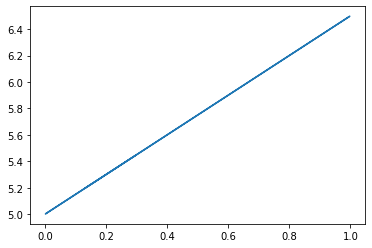

In [5]:
x = np.random.rand(1000,1)
w0 = 5
w1 = 1.5
y = w1*x + w0
plt.plot(x,y)

b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

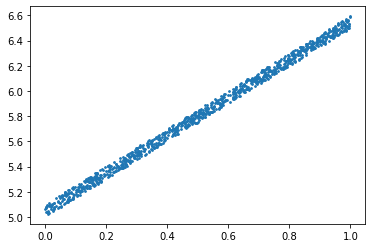

In [6]:
noise = np.random.rand(1000,1)
ycor = y + 0.1*noise
plt.scatter(x,ycor,s=3)

c) Plot the error surface

we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)

i) take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface.

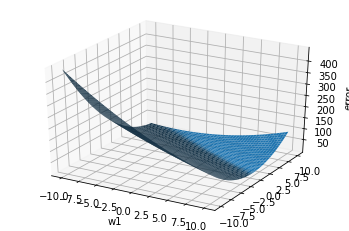

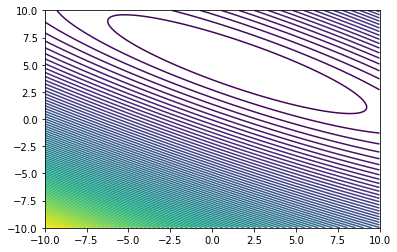

In [7]:
w1 = np.linspace(-10,10,1000)
w0 = np.linspace(-10,10,1000)

error = []

for i in w0:
  error_list = []
  for j in w1:  error_list.append(np.mean(np.square(ycor - i - j*x)))
  error.append(np.asarray(error_list))

error = np.asarray(error)

w0, w1 = np.meshgrid(w0, w1)
ax = plt.axes(projection='3d')
ax.plot_surface(w0,w1, error)
ax.set_xlabel("w0")
ax.set_xlabel("w1")
ax.set_zlabel("error")
plt.show()
plt.contour(w0,w1,error,100)
plt.show()

d) Gradient descent:

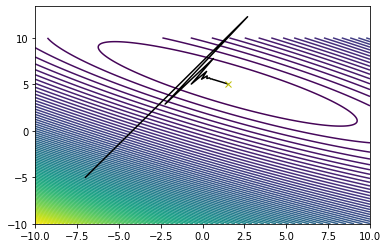

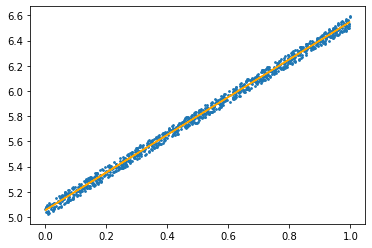

In [8]:
w1_init=[-7]
w0_init=[-5]
lr = 0.6

while True :
    y_pred_rand = w1_init[-1]*x + w0_init[-1]
    del_error_w1 = (np.mean((ycor-y_pred_rand)*x))*-2*lr
    del_error_w0 = (np.mean(ycor-y_pred_rand))*-2*lr
    w1_init.append(w1_init[-1] - del_error_w1)
    w0_init.append(w0_init[-1] - del_error_w0)
    if((abs(round(del_error_w1,7)) <= 0.000001) and (abs(round(del_error_w0,7)) <= 0.000001)) : break

plt.contour(w0,w1,error,100)
plt.plot(np.asarray(w1_init),np.asarray(w0_init),'black')
plt.plot(w1_init[-1],w0_init[-1],'yx')
plt.show()
plt.scatter(x,ycor,s=3)
plt.plot(x,w0_init[-1] + w1_init[-1]*x,c='orange')

#  3. Fitting of a plane (two variables)

Here, we will try to fit plane using multiveriate regression

i) Generate x1 and x2 from range -1 to 1, (30 samples)

ii) Equation of plane $y=w0+w1x1+w2x2$

iii) Here we will fix w0 and will learn w1 and w2 

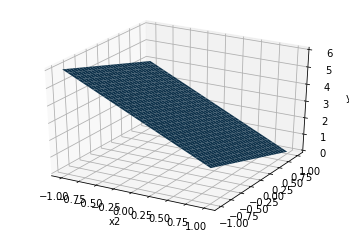

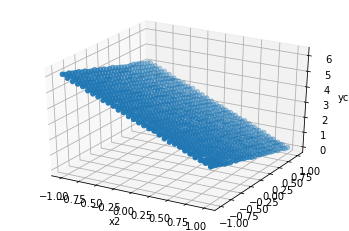

In [9]:
x1 = np.linspace(-1, 1, 30)
x2 = np.linspace(-1, 1, 30)
w0,w1,w2 = 3,-2,-1

X1, X2 = np.meshgrid(x1, x2)
y = np.asarray(w0 + w1*X1 + w2*X2)

noise = np.random.rand(30,30)
ycor = y + 0.1*noise

ax = plt.axes(projection='3d')
ax.plot_surface(X1,X2,y)
ax.set_xlabel("x1")
ax.set_xlabel("x2")
ax.set_zlabel("y")
plt.show()

ax = plt.axes(projection='3d')
ax.scatter(X1,X2,ycor)
ax.set_xlabel("x1")
ax.set_xlabel("x2")
ax.set_zlabel("ycor")
plt.show()

b) Generate Error surface

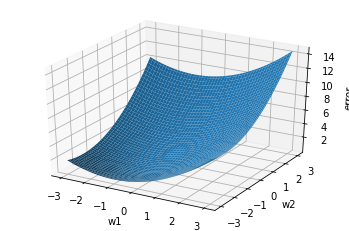

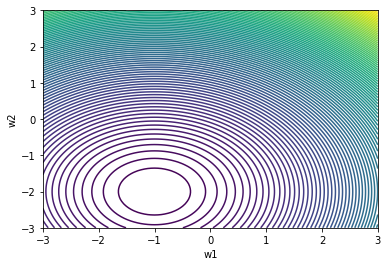

In [10]:
w1_init, w2_init = [-3],[-3]
w0 = np.linspace(0,5,1000)
ypred = np.asarray([i + w1_init[-1]*X1 + w2_init[-1]*X2 for i in w0])
error = np.asarray([np.mean((ycor-ypred[i])**2) for i in range(len(w0))])

np.where(error == np.min(error))[0][0]
w0_optimal = w0[np.where(error == np.min(error))[0][0]]

w1_pred = np.linspace(-3,3,100)
w2_pred = np.linspace(-3,3,100)

error = []

for i in w1_pred:
  error_list = []
  for j in w2_pred:  error_list.append(np.mean(np.square(ycor - w0_optimal - i*X1 - j*X2)))
  error.append(np.asarray(error_list))

error = np.asarray(error)

w1_pred, w2_pred = np.meshgrid(w1_pred, w2_pred)
ax = plt.axes(projection='3d')
ax.plot_surface(w1_pred,w2_pred, error)
ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("error")
plt.show()
plt.contour(w1_pred,w2_pred,error,100)
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()

c) Gradient descent:

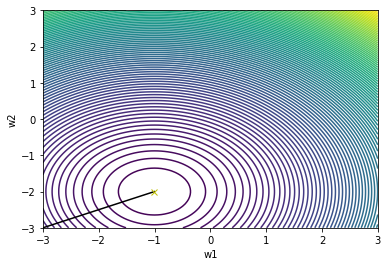

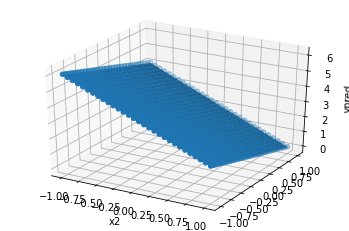

In [11]:
while True :
    y_pred_rand = w1_init[-1]*X1 + w2_init[-1]*X2 + w0_optimal
    del_error_w1 = (np.mean((ycor-y_pred_rand)*X1))*-2*0.4
    del_error_w2 = (np.mean((ycor-y_pred_rand)*X2))*-2*0.4
    w1_init.append(w1_init[-1] - del_error_w1)
    w2_init.append(w2_init[-1] - del_error_w2)
    if((abs(round(del_error_w1,7)) <= 0.000001) and (abs(round(del_error_w2,7)) <= 0.000001)) : break

ypred = np.asarray(w0_optimal + w1_init[-1]*X1 + w2_init[-1]*X2)

plt.contour(w1_pred,w2_pred,error,100)
plt.xlabel("w1")
plt.ylabel("w2")
plt.plot(np.asarray(w2_init),np.asarray(w1_init),'black')
plt.plot(w2_init[-1],w1_init[-1],'yx')
plt.show()

ax = plt.axes(projection='3d')
ax.scatter(X1,X2,ypred)
ax.set_xlabel("x1")
ax.set_xlabel("x2")
ax.set_zlabel("ypred")
ax.plot_surface(X1,X2,y)

# 4. Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

(5, 1000)
(6, 1)
(6, 1000)
(1000, 1)
[[1.05026867]
 [1.99841208]
 [3.00147057]
 [4.9991101 ]
 [9.00051013]
 [2.99971197]]
[[1.05016396]
 [2.00529479]
 [2.99290063]
 [4.98940684]
 [8.98268024]
 [2.99446251]]


Text(0.5, 1.0, 'Error plot')

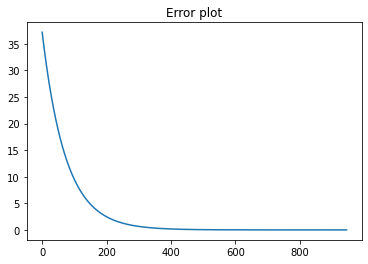

In [12]:
class regression:
  def init(self, name='reg'):
    self.name = name 

  def grad_update(self,w_old,lr,y,x):
    return w_old + 2*lr*(x @ (y - x.T @ w_old))/y.shape[0]

  def error(self,w,y,x):
    return np.mean(np.square(y - x.T @ w))

  def mat_inv(self,y,x_aug):
    return np.linalg.pinv(x_aug @ x_aug.T) @ x_aug @ y
    
  def Regression_grad_des(self,x,y,lr=0.01,ep=0.001):
    err = []
    w_pred = np.random.rand(len(x),1)
    while self.error(w_pred,y,x) > ep:
      err.append(self.error(w_pred,y,x))
      w_pred = self.grad_update(w_pred,lr,y,x)
    err = np.asarray(err)
    return w_pred , err

sim_dim = 5
sim_no_data = 1000
x = np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(x.shape)

w = np.array([[1],[2],[3],[5],[9],[3]])
print(w.shape)

x_aug = np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)

y = x_aug.T @ w
print(y.shape)

nois = np.random.uniform(0,1,y.shape)
y = y + 0.1*nois

reg = regression()
w_opt = reg.mat_inv(y,x_aug)
print(w_opt)

w_pred , err = reg.Regression_grad_des(x_aug,y)
print(w_pred)

plt.plot(err)
plt.title('Error plot')

# 5. Polynomial regression:

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. fit the generated curve using different polynomial order. (Using matrix inversion, and Home work using gradient descent)

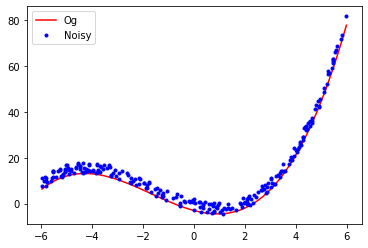

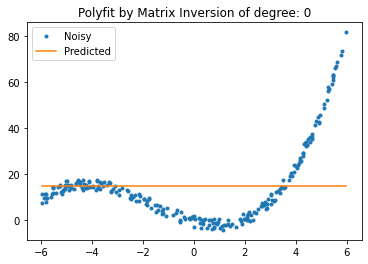

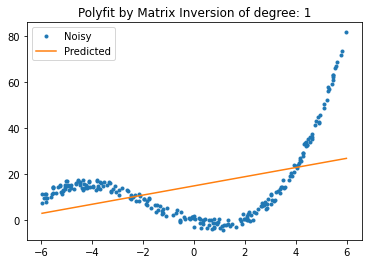

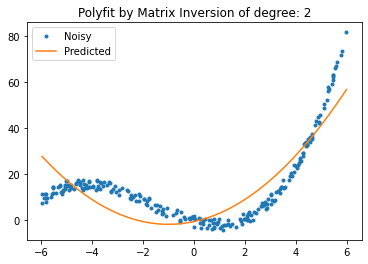

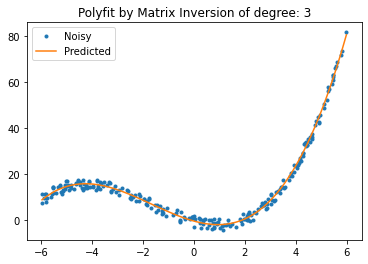

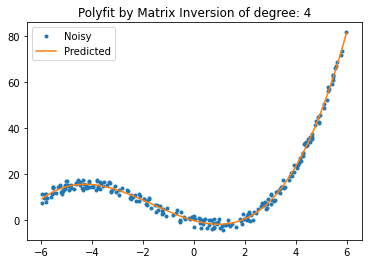

In [13]:
x = np.sort(np.random.uniform(-6,6,(1,250)))
w=np.array([[-3],[-3],[1.25],[0.25]])

def data_transform(X,degree): 
  X_new = np.ones(X.shape)
  for i in range(degree): X_new = np.concatenate((X_new,x**(i+1)))
  return X_new

X = data_transform(x,3)
y = X.T @ w
ycor = y + 5*np.random.uniform(0,1,y.shape)
plt.plot(x.T,y,'r',label='Og')
plt.plot(x.T,ycor,'b.',label='Noisy')
plt.legend()

reg = regression()

degrees = [0,1,2,3,4]
for degree in degrees:
  X_1 = data_transform(x,degree)
  w_mat = reg.mat_inv(ycor,X_1)
  y_pred = X_1.T @ w_mat
  plt.figure()
  plt.plot(x.T,ycor,'.',label='Noisy')
  plt.plot(x.T,y_pred,label='Predicted')
  plt.title('Polyfit by Matrix Inversion of degree: '+str(degree))
  plt.legend()

# 6: Practical example (salary prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Perform using matrix inversion and using Gradiant descent  method
4. find the mean square error in test. (as performance measure) 

In [14]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/u/0/uc?id=15TFzgaRMaENglApfKjbNDunstoZmmz9z'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data.csv')  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

def trainTestSplit(df,shuffle=True,augment=True):
  df_shuffled = df.sample(frac=int(shuffle)).reset_index(drop=True)
  df_train = df_shuffled.iloc[:math.ceil(0.9*len(df_shuffled)),:]
  df_test = df_shuffled.iloc[math.floor(0.9*len(df_shuffled)):,:]
  x_train = df_train.iloc[:,:-1].to_numpy()
  y_train = df_train.iloc[:,-1].to_numpy()
  x_test = df_test.iloc[:,:-1].to_numpy()
  y_test = df_test.iloc[:,-1].to_numpy()
  if augment:
    x_train = np.concatenate((np.ones((x_train.shape[0],1)), x_train),axis=1)
    x_test = np.concatenate((np.ones((x_test.shape[0],1)), x_test),axis=1)
  return x_train.T,y_train,x_test.T,y_test

data = pd.read_csv('data.csv')
x_train,y_train,x_test,y_test = trainTestSplit(data)

reg=regression()
w_pred_matrix = reg.mat_inv(y_train,x_train)
error_train = reg.error(w_pred_matrix,y_train,x_train)/((np.max(y_train)-np.mean(y_train))**2)
error_test = reg.error(w_pred_matrix,y_test,x_test)/((np.max(y_test)-np.mean(y_test))**2)
y_pred = x_test.T @ w_pred_matrix

print('Normalized training error =',error_train,'\n')
print('Normalized testing error =',error_test,'\n')
print('predicted salary =',y_pred[0:3],'\n')
print('actual salary =',y_test[0:3])

Normalized training error= 0.028880471903680153 

Normalized testing error= 0.04591433331341297 

predicted salary= [69529.24188963 33816.62700025 58822.10898527] 

actual salary= [74060 39904 53778]
